In [10]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [16]:
df = pd.read_pickle("./results/results_10.pkl")

In [17]:
df

,cm_depth,cm_width,k_percentile,accuracy
0,10,1616,0.01,0.990148
1,10,1616,0.02,0.980742
2,10,1616,0.03,0.971695
3,10,1616,0.04,0.960463
4,10,1616,0.05,0.950717
...,...,...,...,...
9995,10,161597,0.96,0.999691
9996,10,161597,0.97,1.000000
9997,10,161597,0.98,1.000000
9998,10,161597,0.99,1.000000


<AxesSubplot:xlabel='cm_width', ylabel='accuracy'>

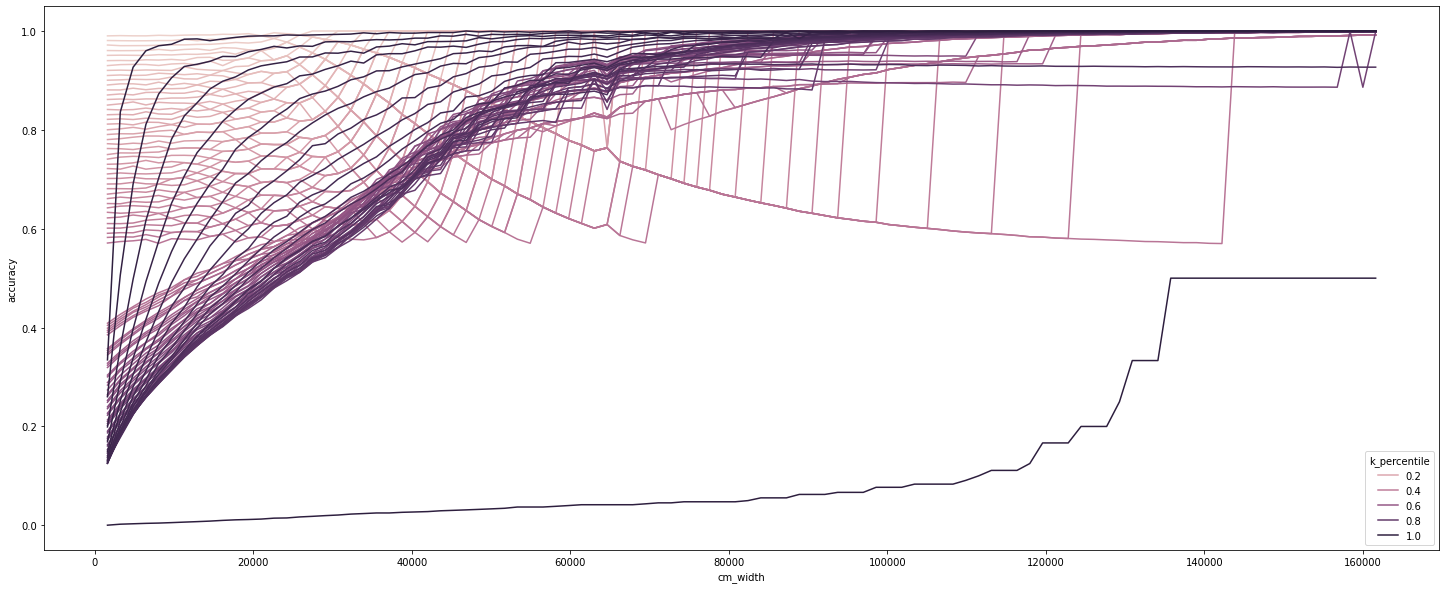

In [34]:
plt.figure(figsize=(25, 10))
# sns.lineplot(x="cm_width", y="accuracy", hue="k_percentile", data=df, palette=sns.color_palette(n_colors=100))
sns.lineplot(x="cm_width", y="accuracy", hue="k_percentile", data=df)

In [25]:
actual_heavy_hitters = pd.read_pickle("./results/flow_packet_count.pkl").sort_values(by='Packet Count', ascending=False)
actual_heavy_hitters

,Flow ID,Packet Count
7905,240.10.73.217|240.10.68.10|80|52657|6,223592
774,240.10.96.25|240.10.82.12|443|51769|6,221114
12715,240.10.129.11|240.10.127.72|443|41678|6,135331
810,240.10.149.203|240.10.49.124|443|54005|6,130692
24,240.10.75.238|240.10.56.247|443|54733|6,128387
...,...,...
82993,240.10.55.159|240.10.97.97|27017|51520|6,1
82991,240.10.49.27|240.10.76.115|56771|15334|6,1
82990,240.10.73.76|240.10.63.250|1934|5105|6,1
82989,240.10.98.222|240.10.59.36|51357|177|6,1


In [26]:
cms_heavy_hitters = pd.read_pickle("./results/cms_heavy.pkl").sort_values(by='Packet Count', ascending=False)
cms_heavy_hitters

,Flow ID,Packet Count
0,240.10.85.4|240.10.53.73|443|55469|6,1616
119343,240.10.86.166|240.10.106.242|993|57125|6,1616
119381,240.10.57.157|240.10.69.243|46665|1065|6,1616
119382,240.10.99.121|240.10.61.88|40646|5555|6,1616
119386,240.10.99.65|240.10.92.39|60599|443|6,1616
...,...,...
74997,240.10.135.82|240.10.69.37|443|51338|6,483
25467,240.10.108.124|240.10.97.181|48344|34953|6,483
43084,240.10.89.38|240.10.98.96|80|52468|6,483
13737,240.10.105.103|240.10.145.147|51578|80|6,483


In [28]:
actual_quantile = actual_heavy_hitters.quantile(0.9)[0]
cms_quantile = cms_heavy_hitters.quantile(0.9)[0]

heavy_actual_flows = set(actual_heavy_hitters.loc[actual_heavy_hitters['Packet Count'] >= actual_quantile]['Flow ID'])
heavy_cms_flows = set(cms_heavy_hitters.loc[cms_heavy_hitters['Packet Count'] >= cms_quantile]['Flow ID'])


In [31]:
len(heavy_actual_flows)

16438

In [30]:
len(heavy_cms_flows)

70385